# Pseudo-probability functions

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from qutip import about, basis, dag, destroy, qfunc, wigner, wigner_cmap

%matplotlib inline

## Wigner function for superposition of fock states

In [2]:
x = 1.0 / np.sqrt(2) * (basis(10, 4) + basis(10, 2))
xvec = np.arange(-5, 5, 10.0 / 100)
yvec = xvec
W = wigner(x, xvec, yvec)
cmap = wigner_cmap(W)
X, Y = np.meshgrid(xvec, yvec)

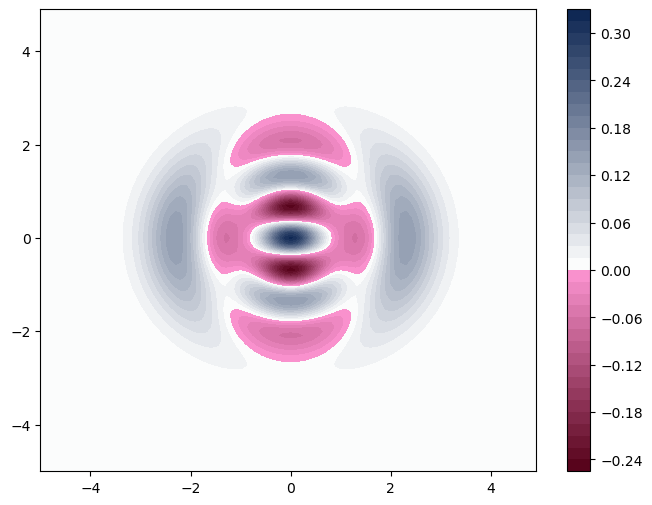

In [3]:
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, W, 50, cmap=cmap)
plt.colorbar();

/tmp/ipykernel_9662/1375824337.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-30, elev=73)


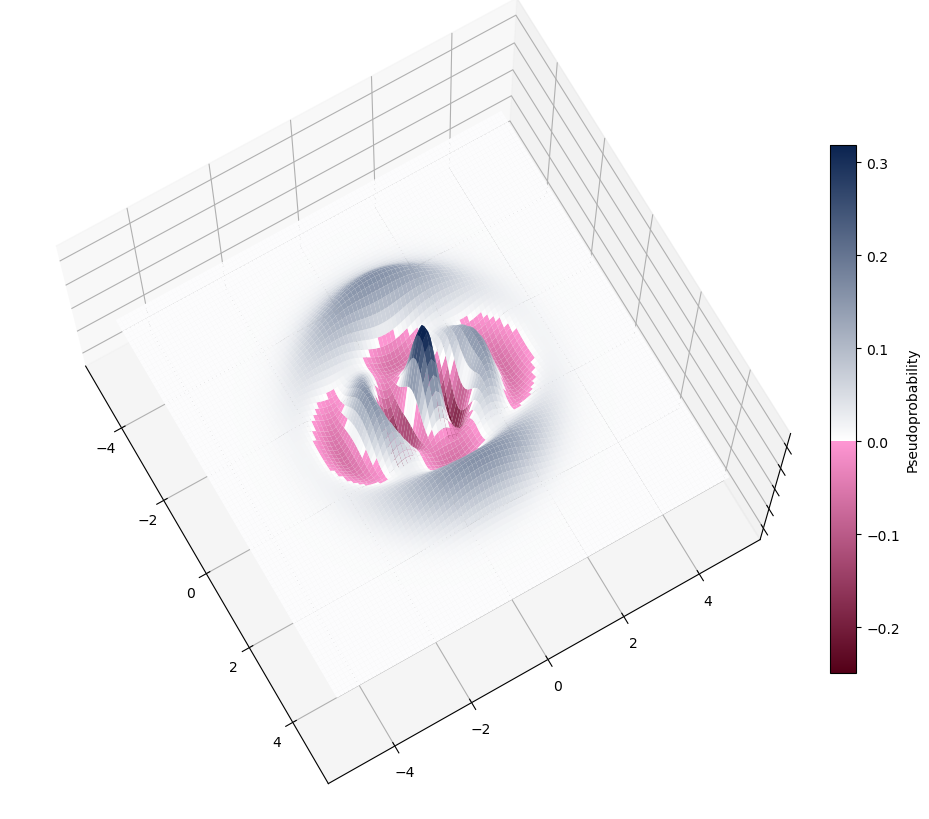

In [4]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, azim=-30, elev=73)
ax.plot_surface(X, Y, W, cmap=cmap, rstride=1, cstride=1, alpha=1, linewidth=0)
ax.set_zlim3d(-0.25, 0.25)
for a in ax.w_zaxis.get_ticklines() + ax.w_zaxis.get_ticklabels():
    a.set_visible(False)
nrm = mpl.colors.Normalize(W.min(), W.max())
cax, kw = mpl.colorbar.make_axes(ax, shrink=0.66, pad=0.02)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=nrm)
cb1.set_label("Pseudoprobability")

## Winger and Q-function for squeezed states

In [5]:
N = 20
alpha = -1.0  # Coherent amplitude of field
epsilon = 0.5j  # Squeezing parameter
a = destroy(N)

D = (alpha * a.dag() - np.conj(alpha) * a).expm()  # Displacement
S = (
    0.5 * np.conj(epsilon) * a * a - 0.5 * epsilon * a.dag() * a.dag()
).expm()  # Squeezing
psi = D * S * basis(N, 0)  # Apply to vacuum state
g = 2

### Wigner function

/tmp/ipykernel_9662/1340448683.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig1)


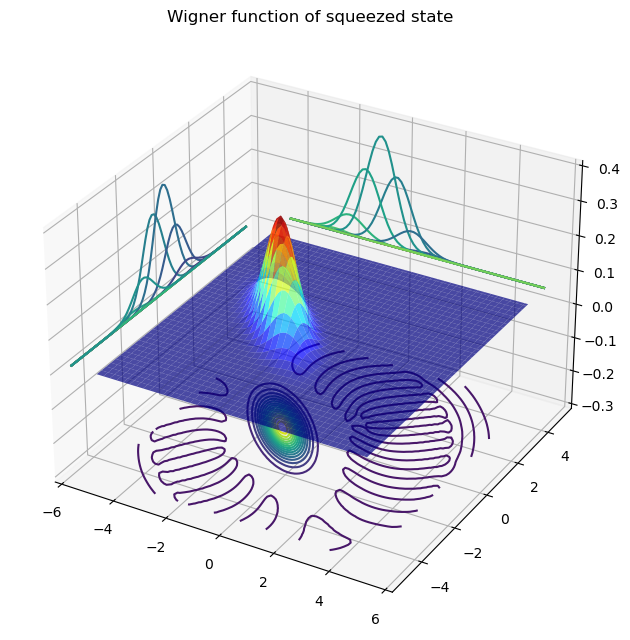

In [6]:
xvec = np.arange(-40.0, 40.0) * 5.0 / 40
X, Y = np.meshgrid(xvec, xvec)

W = wigner(psi, xvec, xvec)

fig1 = plt.figure(figsize=(8, 6))
ax = Axes3D(fig1)
ax.plot_surface(X, Y, W, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, W, 15, zdir="x", offset=-6)
ax.contour(X, Y, W, 15, zdir="y", offset=6)
ax.contour(X, Y, W, 15, zdir="z", offset=-0.3)
ax.set_xlim3d(-6, 6)
ax.set_xlim3d(-6, 6)
ax.set_zlim3d(-0.3, 0.4)
plt.title("Wigner function of squeezed state");

### Q-function

/tmp/ipykernel_9662/3179379782.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig2)


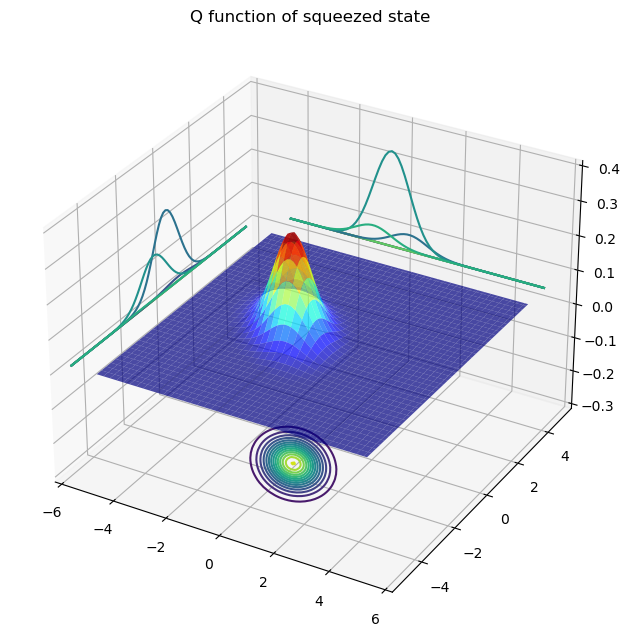

In [7]:
Q = qfunc(psi, xvec, xvec, g)

fig2 = plt.figure(figsize=(8, 6))
ax = Axes3D(fig2)
ax.plot_surface(X, Y, Q, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, Q, zdir="x", offset=-6)
ax.contour(X, Y, Q, zdir="y", offset=6)
ax.contour(X, Y, Q, 15, zdir="z", offset=-0.4)
ax.set_xlim3d(-6, 6)
ax.set_xlim3d(-6, 6)
ax.set_zlim3d(-0.3, 0.4)
plt.title("Q function of squeezed state");

## Schrodinger cat state

In [8]:
N = 20
# amplitudes of coherent states
alpha1 = -2.0 - 2j
alpha2 = 2.0 + 2j
# define ladder oeprators
a = destroy(N)
# define displacement oeprators
D1 = (alpha1 * dag(a) - np.conj(alpha1) * a).expm()
D2 = (alpha2 * dag(a) - np.conj(alpha2) * a).expm()
# sum of coherent states
psi = np.sqrt(2) ** -1 * (D1 + D2) * basis(N, 0);  # Apply to vacuum state

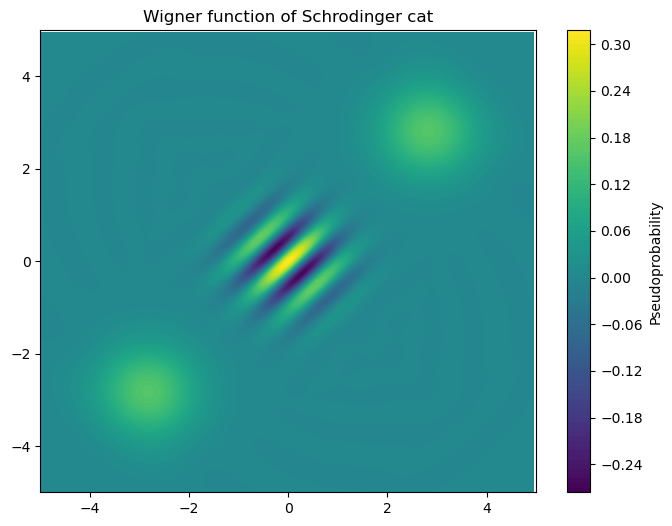

In [9]:
# calculate Wigner function
yvec = xvec = np.arange(-100.0, 100.0) * 5.0 / 100
g = 2.0
W = wigner(psi, xvec, yvec)
fig = plt.figure(figsize=(8, 6))
c = plt.contourf(xvec, yvec, np.real(W), 100)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title("Wigner function of Schrodinger cat")
cbar = plt.colorbar(c)
cbar.ax.set_ylabel("Pseudoprobability");

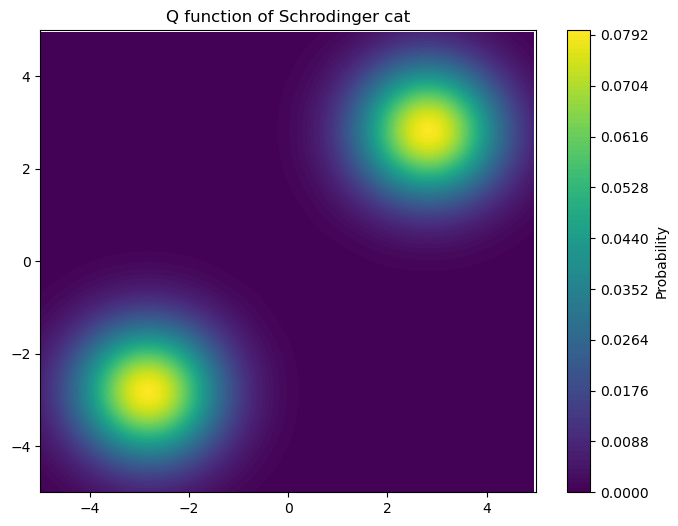

In [10]:
# calculate Q function
Q = qfunc(psi, xvec, yvec)
fig = plt.figure(figsize=(8, 6))
qplt = plt.contourf(xvec, yvec, np.real(Q), 100)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title("Q function of Schrodinger cat")
cbar = plt.colorbar(qplt)
cbar.ax.set_ylabel("Probability");

## Software version:

In [11]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.6
Numpy Version:      1.26.4
Scipy Version:      1.12.0
Cython Version:     0.29.37
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     4
BLAS Info:          Generic
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v4/lib/python3.10/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex refer